# Vortrace Quick Start

This guide will take you through a simple example showing how to do a density projection and slice of a Voronoi mesh. The input data for this notebook comes from snapshot 22 of the `galaxy_merger_star_formation_3d` example in the public version of the [Arepo code](https://arepo-code.org/).

In [1]:
import numpy as np
from vortrace import vortrace as vt
import matplotlib.pyplot as plt
import matplotlib as mpl
import h5py as h5

First we define a function which reads in an Arepo file, which is stored using the hdf5 file format. This would be replaced by user code interfacing or generating their needed data.

In [2]:
def read_arepo_snap(snapname):
    f = h5.File(snapname, mode='r')

    pos = np.array(f['PartType0']['Coordinates'])
    rho = np.array(f['PartType0']['Density'])
    BoxSize = f['Parameters'].attrs['BoxSize']

    f.close()

    return pos, rho, BoxSize

Next, we actually load in the data and create a Projection Cloud object. This object stores the Voronoi mesh data and facilitates various operations over the dataset.

In [3]:
snapname = '../tests/test_data/galaxy_interaction.hdf5'
pos, rho, BoxSize = read_arepo_snap(snapname)

L = 75.
pc = vt.ProjectionCloud(pos, rho, boundbox=[0., BoxSize, 0., BoxSize, 0., BoxSize])

Applying bounding box...
npart: 7217
Snapshot loaded.
Building tree...
Tree build took 0 milliseconds.


Now, we define the parameters for the projection we would like to do. For this, we'll do a grid projection which is useful for making images of galaxies. We'll do a projection in the 'xy' plane and the 'xz' plane.

In [4]:
extent = [BoxSize / 2. - L / 2., BoxSize / 2. + L / 2.]
bounds = [0., BoxSize]
# npix = 512
npix = 256
center = [BoxSize/2., BoxSize/2., BoxSize/2.]

dat_xy = pc.grid_projection(extent, npix, bounds, None)
dat_xz = pc.grid_projection(extent, npix, bounds, center, proj='xz')

Making projection...
Projection generation took 1549 milliseconds.
Making projection...
Projection generation took 1694 milliseconds.


Now, let's make a plot of this data.

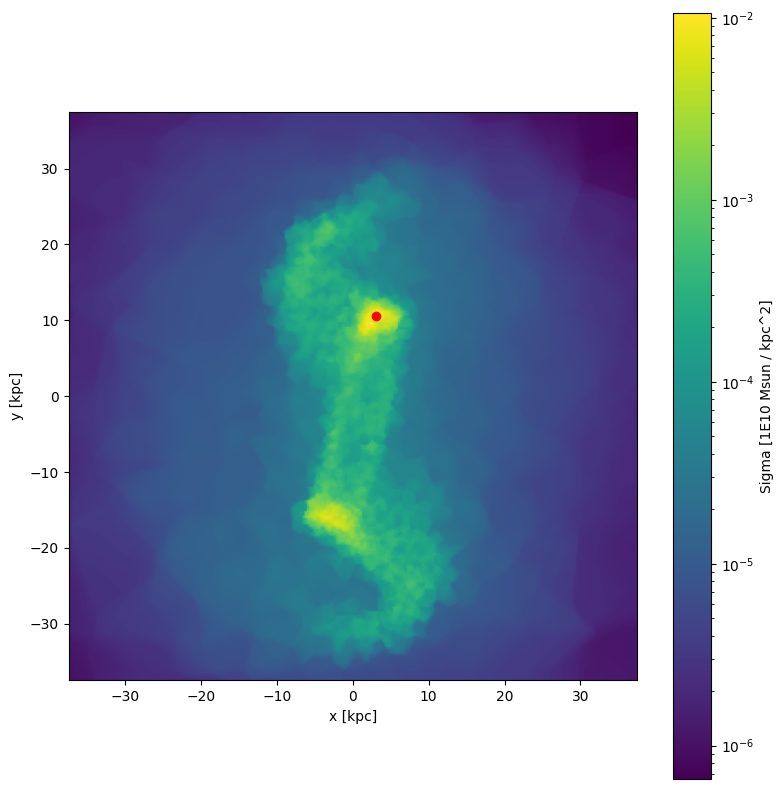

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

im = ax.imshow(dat_xy.T, extent=[-L/2., L/2., -L/2., L/2.], origin = 'lower', norm=mpl.colors.LogNorm())

ax.set_xlabel('x [kpc]')
ax.set_ylabel('y [kpc]')

ax.scatter(3, 10.5, c='r')

fig.colorbar(im, ax=ax, label='Sigma [1E10 Msun / kpc^2]')
fig.tight_layout()

plt.show()

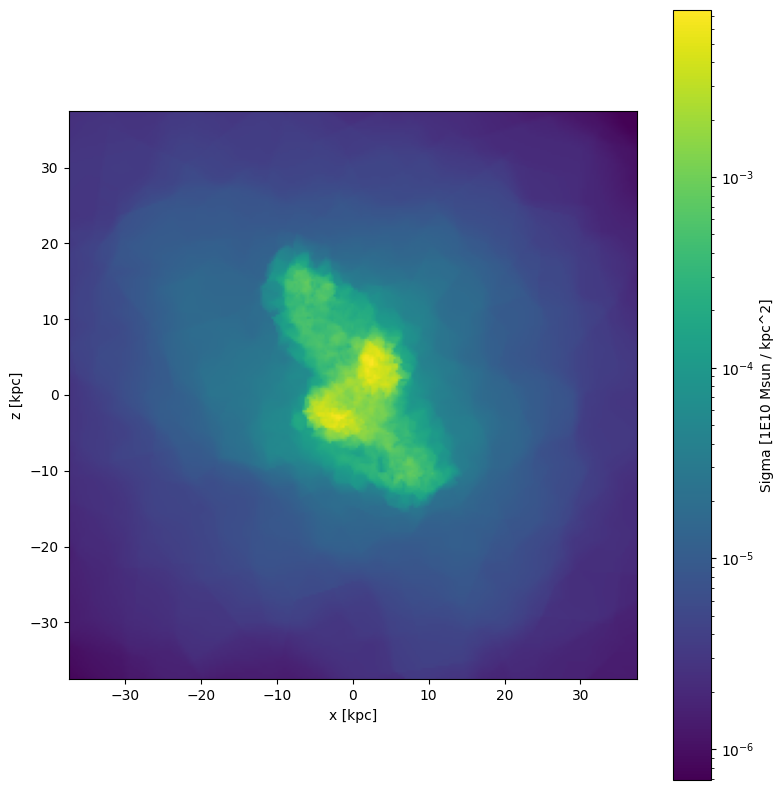

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

im = ax.imshow(dat_xz.T, extent=[-L/2., L/2., -L/2., L/2.], origin = 'lower', norm=mpl.colors.LogNorm())

ax.set_xlabel('x [kpc]')
ax.set_ylabel('z [kpc]')

fig.colorbar(im, ax=ax, label='Sigma [1E10 Msun / kpc^2]')
fig.tight_layout()

plt.show()

Making projection...
Projection generation took 809 milliseconds.


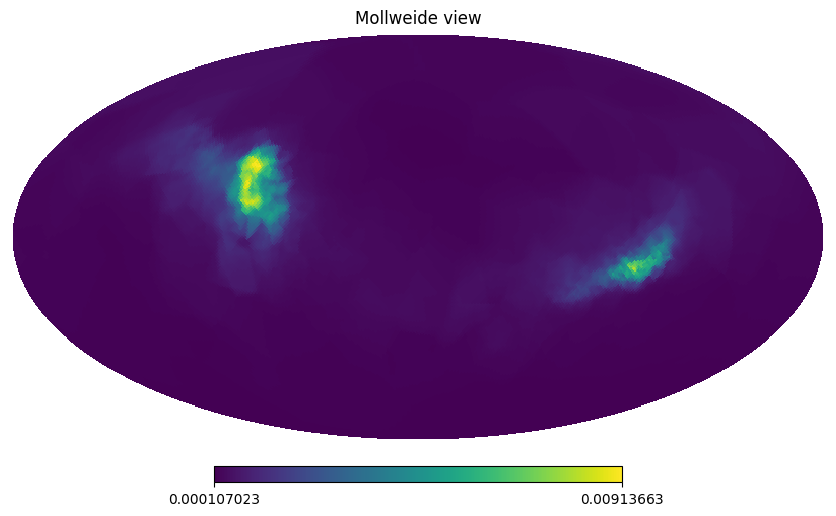

In [7]:
import healpy as hp, numpy as np, matplotlib.pyplot as plt
from vortrace import vortrace as vt

### get pos and rho from simulation snapshot

### initialize the healpix grid and calculate the unit vectors towards each pixel
### the start position for each vector is the origin
nside = 64
npix = hp.nside2npix(nside)
res = hp.nside2resol(nside)

unitv = np.array(hp.pix2vec(nside=nside, ipix=np.arange(npix))).T
pts_end = 100*np.array(unitv)
pts_start = np.zeros_like(pts_end)

pts_start += BoxSize/2.
pts_end += BoxSize/2.

### do projection
dens = pc.projection(pts_start, pts_end)

### make plot
hp.mollview(dens)
plt.show()

We can also pull out all of the cells along the ray. Because the ray that is returned has a variable length that is determined at runtime, this can only be done one ray at a time.

In [8]:
pt_start = np.array([BoxSize/2. + 3, BoxSize/2. + 10.5, 0])
pt_end = np.array([BoxSize/2. + 3, BoxSize/2. + 10.5, BoxSize])

dens, cell_ids, s_vals, ds_vals = pc.single_projection(pt_start, pt_end)

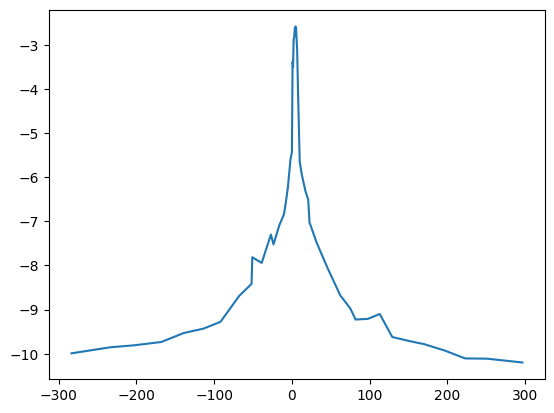

In [9]:
plt.plot(s_vals - BoxSize/2., np.log10(rho[cell_ids]))